# Yelp API - Lab
https://github.com/jirvingphd/dsc-yelp-api-lab/tree/solution

## Introduction 

We've seen how the Yelp API works and how to create basic visualizations using Folium. It's time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 

* Using pagination and multiple functions, gather large amounts of data from an API, parse the data and make sense of it with meaningful analysis
* Create maps using Folium

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retrieving 50 at a time. Processes such as these are often referred to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you but make the request below.

In [1]:
# Your code here
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
api_key = get_keys('/Users/jamesirving/.secret/yelp_api.json')['api_key']

In [2]:
import requests
term = 'Pizza'
location = 'Baltimore, MD'
SEARCH_LIMIT = 10


headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }
url = "https://api.yelp.com/v3/businesses/search"

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "BJrktyd8gy1bPd9flu54RA", "alias": "isabellas-brick-oven-pizza-and-panini-baltimore", "name": "Isabella's Brick Oven Pizza and Panini", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/5pf2EDd3hiqBGIOUYIQLIA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/isabellas-brick-oven-pizza-and-panini-baltimore?adjust_creative=dTD4bQ8glEIuLwnjjDnCgQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dTD4bQ8glEIuLwnjjDnCgQ", "review_count": 525, "categories": [{"alias": "italian", "title": "Italian"}, {"alias": "pizza", "title": "Pizza"}, {"alias": "sandwiches", "title": "Sandwiches"}], "rating": 4.5, "coordinates": {"latitude": 39.2870444, "longitude": -76.6020995}, "transactions": ["delivery", "pickup"], "price": "$$", "location": {"address1": "221 S High St", "address2": "", "address3": "", "city": "Baltimore", "zip_code": "21202", "country": "US", "state": "MD", "display_address": ["221 S High St", "Ba

In [3]:
## .json
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [4]:
response.json()['total']

1200

In [5]:
import pandas as pd
df = pd.DataFrame(response.json()['businesses'])
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,BJrktyd8gy1bPd9flu54RA,isabellas-brick-oven-pizza-and-panini-baltimore,Isabella's Brick Oven Pizza and Panini,https://s3-media1.fl.yelpcdn.com/bphoto/5pf2ED...,False,https://www.yelp.com/biz/isabellas-brick-oven-...,525,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 39.2870444, 'longitude': -76.6020...","[delivery, pickup]",$$,"{'address1': '221 S High St', 'address2': '', ...",+14109628888,(410) 962-8888,2544.246639
1,417YPonNwsTF-LKjGybNGA,angelis-pizzeria-baltimore-2,Angeli's Pizzeria,https://s3-media4.fl.yelpcdn.com/bphoto/285RaN...,False,https://www.yelp.com/biz/angelis-pizzeria-balt...,239,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 39.2853676681653, 'longitude': -7...",[delivery],$$,"{'address1': '413 S High St', 'address2': '', ...",+14437087556,(443) 708-7556,2746.815371
2,9PgU81DELsu8GaVX8FT45w,underground-pizza-baltimore-2,Underground Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/l2yfFl...,False,https://www.yelp.com/biz/underground-pizza-bal...,37,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.5,"{'latitude': 39.28907, 'longitude': -76.607268}",[delivery],NaN,"{'address1': '30 Market Pl', 'address2': '', '...",+14433476190,(443) 347-6190,2255.198296
3,1n30b0G2weApQ4oEfPMWIA,matthews-pizza-baltimore,Matthew's Pizza,https://s3-media3.fl.yelpcdn.com/bphoto/n9refU...,False,https://www.yelp.com/biz/matthews-pizza-baltim...,475,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 39.2861976623535, 'longitude': -7...",[delivery],$$,"{'address1': '3131 Eastern Ave', 'address2': '...",+14102768755,(410) 276-8755,4095.106366
4,I0GbQkQHF2sinkmG5vA3hg,bricknfire-at-baltimore-marriott-inner-harbor-...,BricknFire at Baltimore Marriott Inner Harbor ...,https://s3-media1.fl.yelpcdn.com/bphoto/wLbKlF...,False,https://www.yelp.com/biz/bricknfire-at-baltimo...,196,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 39.28685, 'longitude': -76.62138}","[delivery, pickup]",$$,"{'address1': '110 S Eutaw St', 'address2': Non...",+14437647847,(443) 764-7847,2690.520752
5,y5Xo6_-vDTTuuXYNLYxVJQ,iggies-baltimore-2,Iggies,https://s3-media3.fl.yelpcdn.com/bphoto/L2XjGb...,False,https://www.yelp.com/biz/iggies-baltimore-2?ad...,392,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 39.2993096, 'longitude': -76.6131...","[delivery, pickup]",$$,"{'address1': '818 N Calvert St', 'address2': '...",+14105280818,(410) 528-0818,1139.265413
6,UYryiA40L6yj2JX8YZ4G0Q,joe-bennys-baltimore,Joe Benny's,https://s3-media1.fl.yelpcdn.com/bphoto/tEVTcQ...,False,https://www.yelp.com/biz/joe-bennys-baltimore?...,725,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 39.2858595235079, 'longitude': -7...",[delivery],$$,"{'address1': '313 S High St', 'address2': '', ...",+14438354866,(443) 835-4866,2684.570855
7,4YQR0ZTvaR-L3Qs9gU-Qfg,paulie-gees-hampden-baltimore-3,Paulie Gee's Hampden,https://s3-media1.fl.yelpcdn.com/bphoto/pb05-5...,False,https://www.yelp.com/biz/paulie-gees-hampden-b...,298,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 39.3307321665263, 'longitude': -7...","[delivery, pickup]",$$,"{'address1': '3535 Chestnut Ave', 'address2': ...",+14108891048,(410) 889-1048,2947.937066
8,AtWb8bkh5IEf-GnpK4ORPQ,joe-squared-pizza-baltimore,Joe Squared Pizza,https://s3-media1.fl.yelpcdn.com/bphoto/zIe6Gw...,False,https://www.yelp.com/biz/joe-squared-pizza-bal...,460,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,"{'latitude': 39.31081713119976, 'longitude': -...","[delivery, pickup]",$$,"{'address1': '33 W N Ave', 'address2': None, '...",,,768.396054
9,fKmcUEomdGcqMnL7SDYH8A,verde-baltimore,Verde,https://s3-media4.fl.yelpcdn.com/bphoto/iAhavN...,False,https://www.yelp.com/biz/verde-baltimore?adjus...,456,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 39.28411, 'longitude': -76.

In [6]:
def search_yelp(term = 'Pizza',location = 'Baltimore, MD',params={}):#,SEARCH_LIMIT = 10):

    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    url = "https://api.yelp.com/v3/businesses/search"

    url_params = {'term': term.replace(' ', '+'),
                  'location': location.replace(' ', '+')}
    url_params.update(params)
    response = requests.get(url, headers=headers, params=url_params)
    return response.json()

In [7]:
response = search_yelp('Chinese')
response

{'businesses': [{'id': 'ry3Y5KSxtn7rVf3amw31rw',
   'alias': 'china-house-baltimore-2',
   'name': 'China House',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0vjN0gFxoCCWJJMGQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/china-house-baltimore-2?adjust_creative=dTD4bQ8glEIuLwnjjDnCgQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dTD4bQ8glEIuLwnjjDnCgQ',
   'review_count': 184,
   'categories': [{'alias': 'chinese', 'title': 'Chinese'}],
   'rating': 4.0,
   'coordinates': {'latitude': 39.2856979370117,
    'longitude': -76.5847778320312},
   'transactions': ['delivery'],
   'price': '$',
   'location': {'address1': '2233 Eastern Ave',
    'address2': '',
    'address3': '',
    'city': 'Baltimore',
    'zip_code': '21231',
    'country': 'US',
    'state': 'MD',
    'display_address': ['2233 Eastern Ave', 'Baltimore, MD 21231']},
   'phone': '+14105223456',
   'display_phone': '(410) 522-3456',
   'distance': 3344.553800678

In [8]:
response.keys()

dict_keys(['businesses', 'total', 'region'])

In [9]:
response['total']

335

In [10]:
len(response['businesses'])

20

In [11]:
df = pd.DataFrame(response['businesses'])
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,ry3Y5KSxtn7rVf3amw31rw,china-house-baltimore-2,China House,https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0...,False,https://www.yelp.com/biz/china-house-baltimore...,184,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.2856979370117, 'longitude': -7...",[delivery],$,"{'address1': '2233 Eastern Ave', 'address2': '...",+14105223456,(410) 522-3456,3344.553801
1,ZFFQuoUajWY_gYZ4HjfIKQ,water-song-yunnan-kitchen-baltimore-3,Water Song Yunnan Kitchen,https://s3-media1.fl.yelpcdn.com/bphoto/lL_yo7...,False,https://www.yelp.com/biz/water-song-yunnan-kit...,68,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 39.276528, 'longitude': -76.613502}","[delivery, pickup]",NaN,"{'address1': '21 E Cross St', 'address2': '', ...",+14438694580,(443) 869-4580,3664.817209
2,JZlGOTvnm2a8B7eGRlZZUg,nihao-baltimore-2,NiHao,https://s3-media1.fl.yelpcdn.com/bphoto/i5Vmne...,False,https://www.yelp.com/biz/nihao-baltimore-2?adj...,79,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.5,"{'latitude': 39.282945, 'longitude': -76.583924}",[delivery],NaN,"{'address1': '2322 Boston St', 'address2': '',...",+14438352036,(443) 835-2036,3640.045127
3,C6ktcKtaj62akb8X0CqAWg,sunny-carry-out-baltimore,Sunny Carry Out,https://s3-media2.fl.yelpcdn.com/bphoto/uTMvf4...,False,https://www.yelp.com/biz/sunny-carry-out-balti...,76,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.28325, 'longitude': -76.62783}",[pickup],$,"{'address1': '758 Washington Blvd', 'address2'...",+14102448816,(410) 244-8816,3317.393328
4,Mt8KF8_1T27QAY3ol1S2cg,wow-food-cafe-baltimore-9,WOW Food Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/O8J8BF...,False,https://www.yelp.com/biz/wow-food-cafe-baltimo...,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 39.292012, 'longitude': -76.616007}",[delivery],$$,"{'address1': '222 N Charles St', 'address2': '...",+16672130043,(667) 213-0043,2012.195728
5,QLr9ZfuU6hNyM1adspWO1A,hao-chi-baltimore-2,Hao chi,https://s3-media2.fl.yelpcdn.com/bphoto/hvnHKQ...,False,https://www.yelp.com/biz/hao-chi-baltimore-2?a...,27,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 39.2838207, 'longitude': -76.5929...","[delivery, pickup]",NaN,"{'address1': '629 S Broadway', 'address2': '',...",+14103270011,(410) 327-0011,3150.494409
6,m69hGqYXyn2RZM_Sl7-ciQ,panda-bbq-baltimore,Panda BBQ,https://s3-media2.fl.yelpcdn.com/bphoto/D8aOHy...,False,https://www.yelp.com/biz/panda-bbq-baltimore?a...,53,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.5,"{'latitude': 39.303624, 'longitude': -76.617175}","[delivery, pickup]",NaN,"{'address1': '30 W Biddle St', 'address2': Non...",+13108943736,(310) 894-3736,941.481971
7,agf95R52ibcUTde8FjsZAg,chopstix-gourmet-rosedale-2,Chopstix Gourmet,https://s3-media2.fl.yelpcdn.com/bphoto/bW2Dwr...,False,https://www.yelp.com/biz/chopstix-gourmet-rose...,271,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,"{'latitude': 39.311612418845, 'longitude': -76...","[delivery, pickup]",$$,"{'address1': '1201 67th St', 'address2': '', '...",+14108662903,(410) 866-2903,7454.069780
8,g_E1mONRDwe2kSQ6jKUTlw,orient-express-baltimore,Orient Express,https://s3-media4.fl.yelpcdn.com/bphoto/GYkX8o...,False,https://www.yelp.com/biz/orient-express-baltim...,140,"[{'alias': 'conveyorsushi', 'title': 'Conveyor...",3.0,"{'latitude': 39.3262711, 'longitude': -76.6155...","[delivery, pickup]",$,"{'address1': '3111 St Paul St', 'address2': ''...",+14108890031,(410) 889-0031,1971.425377
9,JBVolcom6kWoCKiAg7_wEA,paul-chen-hong-kong-restaurant-baltimore,Paul Chen Hong Kong Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/JmY_8e...,False,https://www.yelp.com/biz/paul-chen-hong-kong-r...,93,"[{'alias': 'chinese', 'title': 'Chinese'}]",2.5,"{'latitude': 39.317108, 'longitude': -76.617276}","[delivery, pickup]",$,"{'address1': '2426 N Charl

In [12]:
count = 20


## Pagination

Now that you have an initial response, you can examine the contents of the JSON container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [13]:
response2 = search_yelp(term='Chinese')#,params={'offset':20})
pd.DataFrame(response2['businesses'])

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,ry3Y5KSxtn7rVf3amw31rw,china-house-baltimore-2,China House,https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0...,False,https://www.yelp.com/biz/china-house-baltimore...,184,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.2856979370117, 'longitude': -7...",[delivery],$,"{'address1': '2233 Eastern Ave', 'address2': '...",+14105223456,(410) 522-3456,3344.553801
1,ZFFQuoUajWY_gYZ4HjfIKQ,water-song-yunnan-kitchen-baltimore-3,Water Song Yunnan Kitchen,https://s3-media1.fl.yelpcdn.com/bphoto/lL_yo7...,False,https://www.yelp.com/biz/water-song-yunnan-kit...,68,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 39.276528, 'longitude': -76.613502}","[delivery, pickup]",NaN,"{'address1': '21 E Cross St', 'address2': '', ...",+14438694580,(443) 869-4580,3664.817209
2,JZlGOTvnm2a8B7eGRlZZUg,nihao-baltimore-2,NiHao,https://s3-media1.fl.yelpcdn.com/bphoto/i5Vmne...,False,https://www.yelp.com/biz/nihao-baltimore-2?adj...,79,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.5,"{'latitude': 39.282945, 'longitude': -76.583924}",[delivery],NaN,"{'address1': '2322 Boston St', 'address2': '',...",+14438352036,(443) 835-2036,3640.045127
3,C6ktcKtaj62akb8X0CqAWg,sunny-carry-out-baltimore,Sunny Carry Out,https://s3-media2.fl.yelpcdn.com/bphoto/uTMvf4...,False,https://www.yelp.com/biz/sunny-carry-out-balti...,76,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.28325, 'longitude': -76.62783}",[pickup],$,"{'address1': '758 Washington Blvd', 'address2'...",+14102448816,(410) 244-8816,3317.393328
4,Mt8KF8_1T27QAY3ol1S2cg,wow-food-cafe-baltimore-9,WOW Food Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/O8J8BF...,False,https://www.yelp.com/biz/wow-food-cafe-baltimo...,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 39.292012, 'longitude': -76.616007}",[delivery],$$,"{'address1': '222 N Charles St', 'address2': '...",+16672130043,(667) 213-0043,2012.195728
5,QLr9ZfuU6hNyM1adspWO1A,hao-chi-baltimore-2,Hao chi,https://s3-media2.fl.yelpcdn.com/bphoto/hvnHKQ...,False,https://www.yelp.com/biz/hao-chi-baltimore-2?a...,27,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 39.2838207, 'longitude': -76.5929...","[delivery, pickup]",NaN,"{'address1': '629 S Broadway', 'address2': '',...",+14103270011,(410) 327-0011,3150.494409
6,m69hGqYXyn2RZM_Sl7-ciQ,panda-bbq-baltimore,Panda BBQ,https://s3-media2.fl.yelpcdn.com/bphoto/D8aOHy...,False,https://www.yelp.com/biz/panda-bbq-baltimore?a...,53,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.5,"{'latitude': 39.303624, 'longitude': -76.617175}","[delivery, pickup]",NaN,"{'address1': '30 W Biddle St', 'address2': Non...",+13108943736,(310) 894-3736,941.481971
7,agf95R52ibcUTde8FjsZAg,chopstix-gourmet-rosedale-2,Chopstix Gourmet,https://s3-media2.fl.yelpcdn.com/bphoto/bW2Dwr...,False,https://www.yelp.com/biz/chopstix-gourmet-rose...,271,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...",4.0,"{'latitude': 39.311612418845, 'longitude': -76...","[delivery, pickup]",$$,"{'address1': '1201 67th St', 'address2': '', '...",+14108662903,(410) 866-2903,7454.069780
8,g_E1mONRDwe2kSQ6jKUTlw,orient-express-baltimore,Orient Express,https://s3-media4.fl.yelpcdn.com/bphoto/GYkX8o...,False,https://www.yelp.com/biz/orient-express-baltim...,140,"[{'alias': 'conveyorsushi', 'title': 'Conveyor...",3.0,"{'latitude': 39.3262711, 'longitude': -76.6155...","[delivery, pickup]",$,"{'address1': '3111 St Paul St', 'address2': ''...",+14108890031,(410) 889-0031,1971.425377
9,JBVolcom6kWoCKiAg7_wEA,paul-chen-hong-kong-restaurant-baltimore,Paul Chen Hong Kong Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/JmY_8e...,False,https://www.yelp.com/biz/paul-chen-hong-kong-r...,93,"[{'alias': 'chinese', 'title': 'Chinese'}]",2.5,"{'latitude': 39.317108, 'longitude': -76.617276}","[delivery, pickup]",$,"{'address1': '2426 N Charl

In [14]:
# Your code here; use a function or loop to retrieve all the results from your original request

## Get the first query result
response = search_yelp('Chinese',location = 'Baltimore, MD',params={})

## Check the ['total'] results and the length for the # of results returned
total = response['total']
n_results = len(response['businesses'])
## create a list of dfs 
results = []
results.extend(response['businesses'])
n_results, total

## Create an offset parameter using the 
offset = n_results

## start a for/while loop to get all results
while offset < total:
    response_loop = search_yelp('Chinese',location='Baltimore, MD',
                                params={'offset':offset})
    results.extend(response_loop['businesses'])
    n_results = len(response_loop['businesses'])
    offset += n_results

In [15]:
results

[{'id': 'ry3Y5KSxtn7rVf3amw31rw',
  'alias': 'china-house-baltimore-2',
  'name': 'China House',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0vjN0gFxoCCWJJMGQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/china-house-baltimore-2?adjust_creative=dTD4bQ8glEIuLwnjjDnCgQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dTD4bQ8glEIuLwnjjDnCgQ',
  'review_count': 184,
  'categories': [{'alias': 'chinese', 'title': 'Chinese'}],
  'rating': 4.0,
  'coordinates': {'latitude': 39.2856979370117,
   'longitude': -76.5847778320312},
  'transactions': ['delivery'],
  'price': '$',
  'location': {'address1': '2233 Eastern Ave',
   'address2': '',
   'address3': '',
   'city': 'Baltimore',
   'zip_code': '21231',
   'country': 'US',
   'state': 'MD',
   'display_address': ['2233 Eastern Ave', 'Baltimore, MD 21231']},
  'phone': '+14105223456',
  'display_phone': '(410) 522-3456',
  'distance': 3344.55380067889},
 {'id': 'ZFFQuoUajWY_gYZ4HjfIKQ',

In [16]:
## Save the results to json file
import json
with open('results.json','w') as f:
    json.dump(results,f)

In [17]:
with open('results.json') as f:
    loaded_results = json.load(f)
loaded_results

[{'id': 'ry3Y5KSxtn7rVf3amw31rw',
  'alias': 'china-house-baltimore-2',
  'name': 'China House',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0vjN0gFxoCCWJJMGQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/china-house-baltimore-2?adjust_creative=dTD4bQ8glEIuLwnjjDnCgQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dTD4bQ8glEIuLwnjjDnCgQ',
  'review_count': 184,
  'categories': [{'alias': 'chinese', 'title': 'Chinese'}],
  'rating': 4.0,
  'coordinates': {'latitude': 39.2856979370117,
   'longitude': -76.5847778320312},
  'transactions': ['delivery'],
  'price': '$',
  'location': {'address1': '2233 Eastern Ave',
   'address2': '',
   'address3': '',
   'city': 'Baltimore',
   'zip_code': '21231',
   'country': 'US',
   'state': 'MD',
   'display_address': ['2233 Eastern Ave', 'Baltimore, MD 21231']},
  'phone': '+14105223456',
  'display_phone': '(410) 522-3456',
  'distance': 3344.55380067889},
 {'id': 'ZFFQuoUajWY_gYZ4HjfIKQ',

In [18]:
df = pd.DataFrame(loaded_results)
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,ry3Y5KSxtn7rVf3amw31rw,china-house-baltimore-2,China House,https://s3-media3.fl.yelpcdn.com/bphoto/EjebY0...,False,https://www.yelp.com/biz/china-house-baltimore...,184,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.2856979370117, 'longitude': -7...",[delivery],$,"{'address1': '2233 Eastern Ave', 'address2': '...",+14105223456,(410) 522-3456,3344.553801
1,ZFFQuoUajWY_gYZ4HjfIKQ,water-song-yunnan-kitchen-baltimore-3,Water Song Yunnan Kitchen,https://s3-media1.fl.yelpcdn.com/bphoto/lL_yo7...,False,https://www.yelp.com/biz/water-song-yunnan-kit...,68,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 39.276528, 'longitude': -76.613502}","[pickup, delivery]",NaN,"{'address1': '21 E Cross St', 'address2': '', ...",+14438694580,(443) 869-4580,3664.817209
2,JZlGOTvnm2a8B7eGRlZZUg,nihao-baltimore-2,NiHao,https://s3-media1.fl.yelpcdn.com/bphoto/i5Vmne...,False,https://www.yelp.com/biz/nihao-baltimore-2?adj...,79,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.5,"{'latitude': 39.282945, 'longitude': -76.583924}",[delivery],NaN,"{'address1': '2322 Boston St', 'address2': '',...",+14438352036,(443) 835-2036,3640.045127
3,C6ktcKtaj62akb8X0CqAWg,sunny-carry-out-baltimore,Sunny Carry Out,https://s3-media2.fl.yelpcdn.com/bphoto/uTMvf4...,False,https://www.yelp.com/biz/sunny-carry-out-balti...,76,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 39.28325, 'longitude': -76.62783}",[pickup],$,"{'address1': '758 Washington Blvd', 'address2'...",+14102448816,(410) 244-8816,3317.393328
4,Mt8KF8_1T27QAY3ol1S2cg,wow-food-cafe-baltimore-9,WOW Food Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/O8J8BF...,False,https://www.yelp.com/biz/wow-food-cafe-baltimo...,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 39.292012, 'longitude': -76.616007}",[delivery],$$,"{'address1': '222 N Charles St', 'address2': '...",+16672130043,(667) 213-0043,2012.195728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,UQ6BeOKeM-01v9-8-IQNhw,panera-bread-pikesville,Panera Bread,https://s3-media4.fl.yelpcdn.com/bphoto/LnZlJS...,False,https://www.yelp.com/biz/panera-bread-pikesvil...,37,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",3.0,"{'latitude': 39.3902676, 'longitude': -76.7412...",[pickup],$,"{'address1': '1852 Reisterstown Rd', 'address2...",+14106025125,(410) 602-5125,14504.936752
331,AtwKjW3qylM0781037XMEQ,noodles-and-company-columbia,Noodles & Company,https://s3-media3.fl.yelpcdn.com/bphoto/iMMLXx...,False,https://www.yelp.com/biz/noodles-and-company-c...,135,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",3.0,"{'latitude': 39.1994255, 'longitude': -76.81267}",[],$,"{'address1': '6191 Old Dobbin Ln', 'address2':...",+14108723729,(410) 872-3729,21369.206243
332,K1Xgb1aTIqL7qD0MjewpAA,kellys-cajun-grill-hanover,Kelly's Cajun Grill,https://s3-media2.fl.yelpcdn.com/bphoto/HuOdld...,False,https://www.yelp.com/biz/kellys-cajun-grill-ha...,26,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",2.5,"{'latitude': 39.1570476964906, 'longitude': -7...",[],$,"{'address1': '7000 Arundel Mills Cir', 'addres...",+14105405110,(410) 540-5110,19684.713837
333,viOIpHVViYTOtJw8C7UXng,pho-viet-baltimore-3,Pho Viet,https://s3-media1.fl.yelpcdn.com/bphoto/k5OjG8...,False,https://www.yelp.com/biz/pho-viet-baltimore-3?...,157,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",3.5,"{'latitude': 39.290687, 'longitude': -76.614278}","[delivery, pickup]",$$,"{'address1': '104 Saint Paul St', 'address2': ...",+14102441428,(410) 244-1428,2116.690511


## Exploratory Analysis

Take the restaurants from the previous question and do an initial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

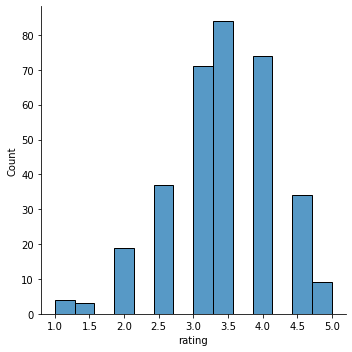

In [19]:
# Your code here
import seaborn as sns
sns.displot(data=df, x='rating')

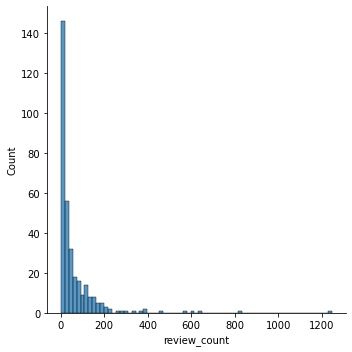

In [20]:
sns.displot(data=df, x='review_count')

In [21]:
df['price'].value_counts(dropna=False).sort_index()#.plot()

$      120
$$     126
$$$      3
NaN     86
Name: price, dtype: int64

In [22]:
# sns.catplot(data=df, x='price',kind='count')

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [23]:
df['coordinates']

0      {'latitude': 39.2856979370117, 'longitude': -7...
1       {'latitude': 39.276528, 'longitude': -76.613502}
2       {'latitude': 39.282945, 'longitude': -76.583924}
3         {'latitude': 39.28325, 'longitude': -76.62783}
4       {'latitude': 39.292012, 'longitude': -76.616007}
                             ...                        
330    {'latitude': 39.3902676, 'longitude': -76.7412...
331     {'latitude': 39.1994255, 'longitude': -76.81267}
332    {'latitude': 39.1570476964906, 'longitude': -7...
333     {'latitude': 39.290687, 'longitude': -76.614278}
334     {'latitude': 39.393877, 'longitude': -76.618202}
Name: coordinates, Length: 335, dtype: object

In [24]:
lat_long = df['coordinates'].iloc[0]
lat_long

{'latitude': 39.2856979370117, 'longitude': -76.5847778320312}

In [25]:
# Your code here
import folium

lat_long = df['coordinates'].iloc[0]
lat = lat_long['latitude']
long = lat_long['longitude']
yelp_map = folium.Map([lat, long])

for row in df.index:
    try:
        lat_long = df['coordinates'][row]
        lat = lat_long['latitude']
        long = lat_long['longitude']
        name = df['name'][row]
        rating = df['rating'][row]
        price = df['price'][row]
        details = f"{name}\nPrice: {str(price)} Rating:{str(rating)}"
        popup = folium.Popup(details, parse_html=True)
        marker = folium.Marker([lat, long], popup=popup)
        marker.add_to(yelp_map)
    except:
        print('Hit error on row: {}'.format(row))
yelp_map


## Summary

Nice work! In this lab, you've made multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice interactive map to display the results using Folium! Well done!